# Kalman Filter applied to Statistical Arbitrage


1. What is the Kalman Filter?


2. The Kalman Filter Library


3. What is Statistical Arbitrage?


4. Excercise






# 1. What is the Kalman Filter

### 1.1 Introduction

a. Rudolf Emil Kalman in 1960 (1930 -2016)

b.  In 2008 the Draper Prize was awarded by the National Academy of Engineering to Rudolf Emil Kalman 

c. “The Kalman filter revolutionized the field of control theory and has become pervasive in engineering systems.” 

d. Is an optimal estimation algorithm that predicts a parameter of interest (such as location, speed, and direction) in presences of noise measurments

e. Aplications: Guidance, navigation, and control systems; computer visión systems; and signal procesing

f. In 1960 was used in the Appollo Project to estimate the trajectories of manned spacecraft to moon and back. 


![Image of Apollo](https://vocaremen.files.wordpress.com/2014/07/moon-02.jpg)


### 1.2 Types of Kalman Filters

There exists three types of Kalman filters that can
be used:

1. Kalman Filter (KF) that was designed for linear systems.


2. The second type is an Extended Kalman Filter (EKF) that was designed for nonlinear system estimation and filtration. 


3. The last type of the Kalman filter is an Unscented Kalman Filter (UKF). The UKF was designed for nonlinear function estimation and filtration. 


#### In this case we are going to talk about the KF for linear systems!

![Image of Apollo](http://www.fccopc.com/wp-content/uploads/2016/07/we-make-it-simple.jpg)

### 1.2 The process

- Is an Iterative Mathematical Process that uses a set of equations and consecutive data inputs to quickly estimate the true value of the object being mesured, when the measured values contains unpredicted random errors, uncertanties, or variation. 



### 1.2.1. Intuition

#### Not observe series:
- Suppose that we want to know the exact position of the Falcon in the space (the space aircraft of space X). 
- The problem is that we can not see where it is exactly. 
- The only thing that we know is that the next position is a function of the last position plus some random noise that is caused by the air and other factors.

\begin{align}
\alpha_{t}  = \alpha_{t-1} - w \\
\end{align}
Where:
\begin{equation*}
w \sim \ \mathcal{N}(0,\,\sigma^{2})
\end{equation*}


Sow we want to make a guest the position in the next day: \begin{align}\alpha_{t}\end{align} 

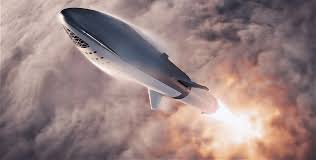

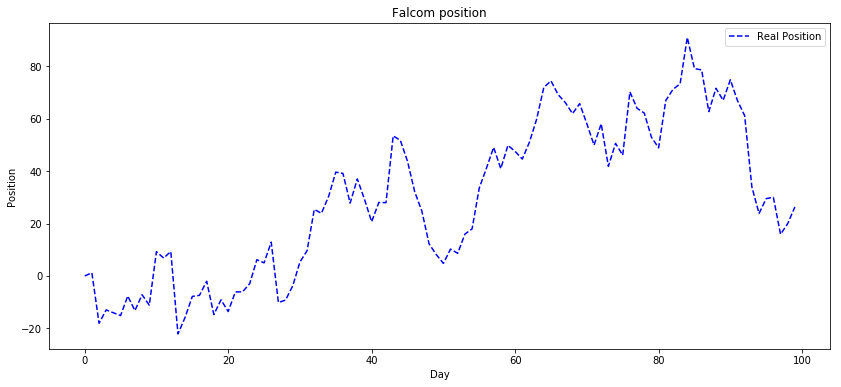

In [35]:
import numpy as np
import pandas as pd
sigma_h = 10.0
h = np.random.normal(0, sigma_h, 110)
h[0] = 0.0
a = np.cumsum(h)

df = pd.DataFrame(a[0:100], columns=['a'])
_=df.plot(figsize=(14,6), style='b--')
plt.title('Falcom position')
plt.legend(['Real Position'])
plt.xlabel('Day')
plt.ylabel('Position');

#### a. Observed Series
The good thing is that Mr. Musk inclued into the aircraft an incredible GPS, that sent (Y) the position each minute with an error of 1 meter:

\begin{align}
Y_{t}  = \alpha_t - v_t \\
\end{align}
Where:
\begin{equation*}
v_t \sim \ \mathcal{N}(0,\,\sigma^{2})
\end{equation*}

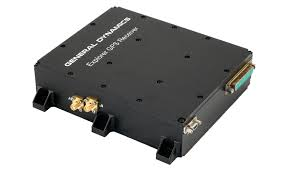

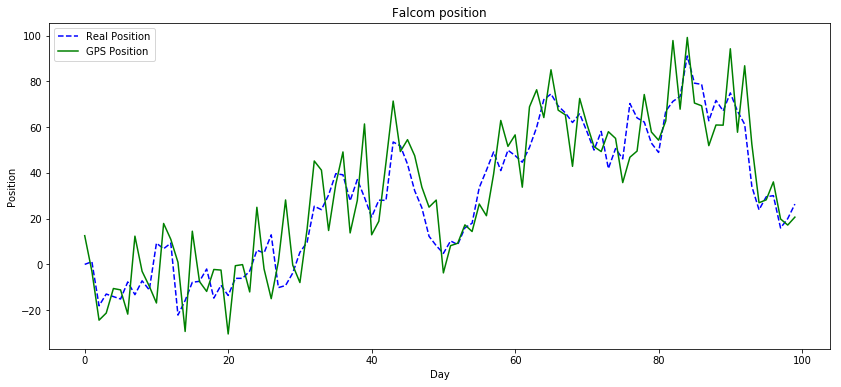

In [36]:
sigma_e = 15.
e = np.random.normal(0, sigma_e, 110)
df['y'] = a[0:100] + e[0:100]
_=df.plot(figsize=(14,6), style=['b--', 'g-',])

plt.legend(['Real Position', 'GPS Position'])
plt.title('Falcom position')
plt.xlabel('Day')
plt.ylabel('Position');

#### b.  Observed Series and the Kalman Filter

If we only receibe the GPS position what we can infer about the exact position of the aircraft:

\begin{align}\alpha_{t}\end{align}

This is when the Kalman Filter enters...

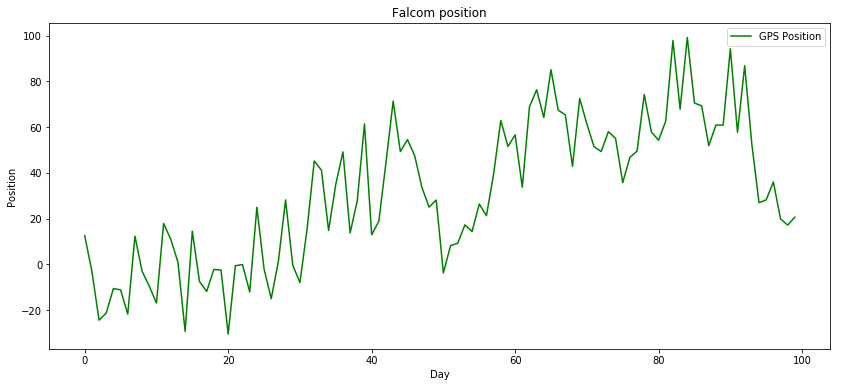

In [37]:
_=df.y.plot(figsize=(14,6), style=['g-',])
plt.legend([ 'GPS Position'])
plt.title('Falcom position')
plt.xlabel('Day')
plt.ylabel('Position');

### 1.2.1. Indepth theory

You can use a Kalman filter in any place where you have uncertain information about some dynamic system, and you can make an educated guess about what the system is going to do next.

### State Space Model for the Example

#### State Equation

\begin{align}
\alpha_{t}  = \alpha_{t-1} - w \\
\end{align}

\begin{equation*}
w_t \sim \ \mathcal{N}(0,\,\sigma_w^{2})
\end{equation*}



#### Observation (Measurement) Equation

\begin{align}
Y_{t}  = \alpha_t - v_t \\
\end{align}

\begin{equation*}
v_t \sim \ \mathcal{N}(0,\,\sigma_v^{2})
\end{equation*}


### 1.2.1 General Linear Kalman Filter

#### State Equation

\begin{align}
\alpha_{t}  = T_t*\alpha_{t-1} - R_t*w_t \\
\end{align}

\begin{equation*}
w_t \sim \ \mathcal{N}(0,\,Q_t)
\end{equation*}



#### Observation (Measurement) Equation

\begin{align}
Y_{t}  = Z_t*\alpha_t - v_t \\
\end{align}

\begin{equation*}
v_t \sim \ \mathcal{N}(0,\,H_t)
\end{equation*}

- T is a transition matrix
- Q is state covariance
- Z is design matrix
- H is observation covariance
- R is selection matrix


### 1.2.2 The algorithm is as follow

1. Take as input a mathematical model of the system 
2. Take as input an initial estimate of the state of the system and the error of the estimate
3. At each time step: 

    - Estimate the current state of the system x_T using the transition matrix
    - Take as input new measurements Z_t
    - use the conditional probability of the measurements given the state, taking into account the uncertainties of the measurement and the state estimate, to update the estimated current state of the system  xt  and the covariance matrix of the estimate  Pt
  

![Image of Apollo](https://upload.wikimedia.org/wikipedia/commons/a/a5/Basic_concept_of_Kalman_filtering.svg)

# 2. Kalman Filter Library in Python

In [16]:
# Import a Kalman filter and other useful libraries
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import poly1d

For our example, we are going to estimate the next state space model 

- State Equation

\begin{align}
\alpha_{t}  = \alpha_{t-1} - w \\
\end{align}

\begin{equation*}
w_t \sim \ \mathcal{N}(0,\,\sigma_w^{2})
\end{equation*}



- Observation (Measurement) Equation

\begin{align}
Y_{t}  = \alpha_t - v_t \\
\end{align}

\begin{equation*}
v_t \sim \ \mathcal{N}(0,\,1)
\end{equation*}

As we see before, we have to make an prior assumption of the initial value of alpha. In this case, we are goin to assume that the initial value of the mean is cero, with a initial variance of 1.

- the (T) transition matrix is 1
- H is observation covariance, and we are going to assume that it is 1
- R is selection matrix

In [52]:
# Set up the filter
kf = KalmanFilter(n_dim_obs=1, n_dim_state=1, # position is 1-dimensional, (x,v) is 2-dimensional
                  initial_state_mean=0,
                  initial_state_covariance=1,
                  transition_matrices=[1],
                  observation_matrices=[1],

                  observation_covariance=1,
                  transition_covariance=1)

state_means, _ = kf.filter(df['y'].values)
state_means = pd.Series(state_means.flatten(), index=df['y'].index)

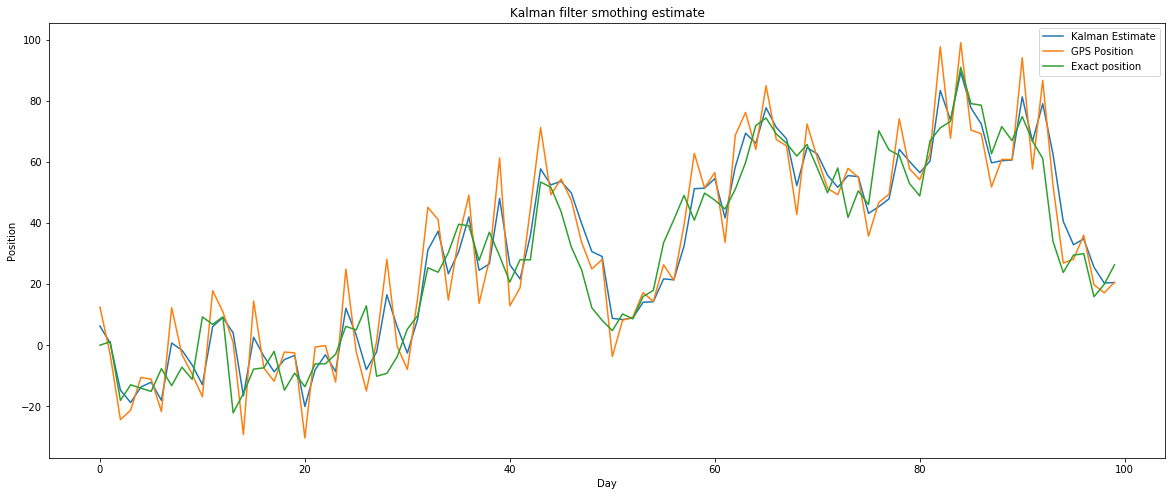

In [53]:
plt.figure(figsize=(20,8))
plt.plot(state_means)
plt.plot(df['y'])
plt.plot(df['a'])
plt.title('Kalman filter smothing estimate')
plt.legend(['Kalman Estimate', 'GPS Position','Exact position'])
plt.xlabel('Day')
plt.ylabel('Position');

# 3. How we can apply the filter in finance

For our example, we are going to estimate the next state space model 

- State Equation

\begin{align}
\beta_{t}  = \beta_{t-1} - w \\
\end{align}

\begin{equation*}
w_t \sim \ \mathcal{N}(0,\,Q)
\end{equation*}



- Observation (Measurement) Equation

\begin{align}
Y_{t}  = \beta_t*X_t - v \\
\end{align}

\begin{equation*}
v_t \sim \ \mathcal{N}(0,\,R)
\end{equation*}

This equation look familiar for you?

- CAPM

# 3.1. What is Statistical arbitrage

Is a class of short-term financial trading strategies that employ mean reversion models involving broadly diversified portfolios of securities (hundreds to thousands) held for short periods of time (generally seconds to days). 
It consist in:

- Buy an under performance stock and sell an over performance stock
- Wait until the process reverts to its mean 




![Image of Apollo](http://www.streetauthority.com/images/PEP_Chart_6-19-13_fw.png)



- To make a good StatArb is required to cointegrate series or two stock that are highly correlate in its fundamentals


# 3.2. StatArb and Kalman Filter

If we find two correlated prices we can estimate an equation that make both stock value the same amount of money

For our example:

- State Equation

\begin{align}
\beta_{t}  = \beta_{t-1} - w \\
\end{align}

\begin{equation*}
w_t \sim \ \mathcal{N}(0,\,Q)
\end{equation*}



- Observation (Measurement) Equation

\begin{align}
Y_{t}  = \beta_t*X_t - v \\
\end{align}

\begin{equation*}
v_t \sim \ \mathcal{N}(0,\,R)
\end{equation*}

\begin{equation*}
Y=Ford \\
X=GM \\
\end{equation*}



In that way we can create a portfolio of Ford that is equall to Y and a portfolio of GM that is equal to: \begin{align}\beta_t*X_t\end{align}

This mean that the value of Ford (y) must be equall to the value of the portfolio of GM:
\begin{align}Y-\beta_t*X_t=0\end{align}


# 4. Statistical Arbitrage - Kalman Filter


1. Libraries


2. Download the data


3. Kalman Filter price regression 
    
    3.1. Price Plot
    
    3.2. GM and F - kalman Filter price regression
    
    

4. Spread graphs


5. Backtesting



![Image of nuyrCi](http://www.colorsmagazine.com/images/cache/images/stories/1877/02_traders-01_750_500_90.jpg)

# 1. Libraries

Import the main libraries used in the code

In [8]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Pandas
import pandas as pd
import numpy as np
# Date time
import datetime as dt
import ta
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='LV696HWG63UPFCPA',output_format='pandas')

# Import a Kalman filter and other useful libraries
from pykalman import KalmanFilter
import scipy
from scipy import poly1d
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Download the data

For a statiscal arbitrage strategy, is required to have two stock pairs that have the same forces affecting its fundamentals. In this case we are going to use General Motors and Ford

### GM and Ford

##### CSV file

We have to import data from CSV file and create the daily and the cumulative return

In [10]:
# Read CSV file
close_price=pd.read_csv('GM_F'+'_close_price.csv' , index_col=0)
close_price = close_price.rename(columns={'5. adjusted close': 'GM'})
close_price.index = pd.to_datetime(close_price.index)
# Create returns

daily_return=pd.DataFrame(np.log(close_price/close_price.shift(1)))*100
#daily_return=daily_return.dropna()
cum_return=pd.DataFrame(daily_return.cumsum())
cum_return=cum_return.dropna()

close_price.head()

,GM,F
date,,
2010-11-18,28.1855,11.7968
2010-11-19,28.2432,11.9139
2010-11-22,28.0948,11.8553
2010-11-23,27.4106,11.4894
2010-11-24,27.6002,11.6724


In [11]:
daily_return.head()

,GM,F
date,,
2010-11-18,NaN,NaN
2010-11-19,0.204506,0.987748
2010-11-22,-0.526821,-0.493076
2010-11-23,-2.465471,-3.135015
2010-11-24,0.689322,1.580221


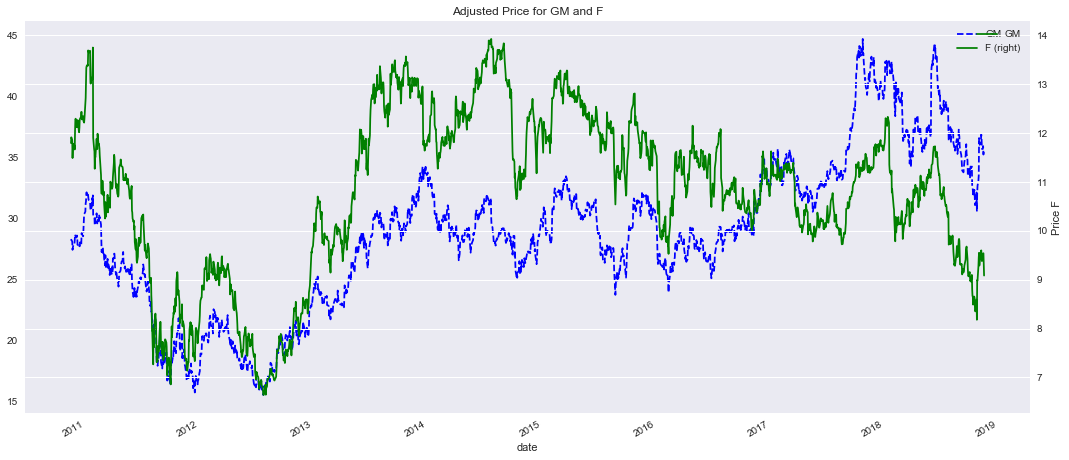

In [21]:
close_price.plot(figsize=(18,8),secondary_y=('F'),style=['b--', 'g-',])
plt.title('Adjusted Price for GM and F')
plt.legend(['GM', 'F'])
plt.ylabel('Price F');

In [5]:
daily_return.corr()

,GM,F
GM,1.000000,0.701126
F,0.701126,1.000000


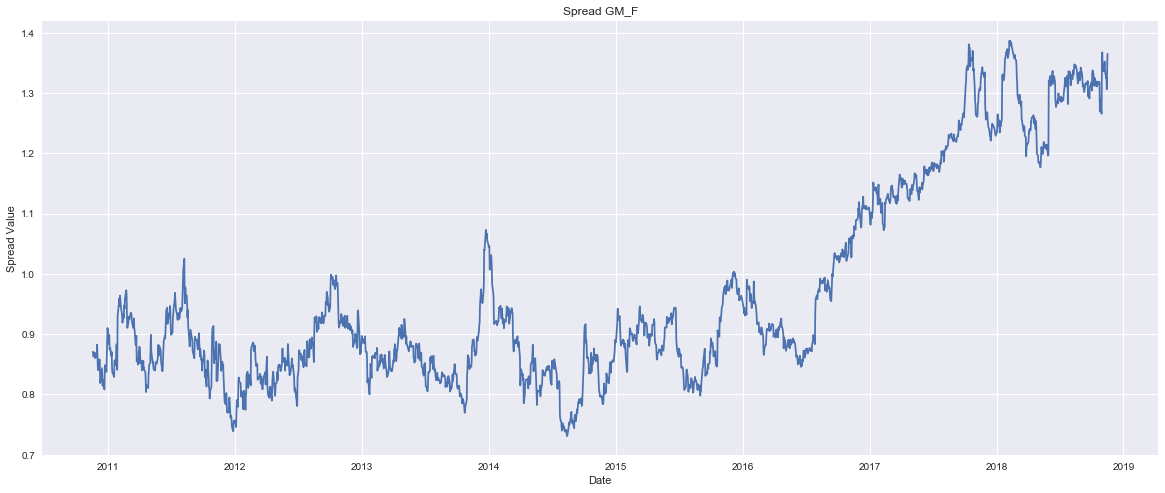

In [6]:
plt.figure(figsize=(20,8))
plt.plot(np.log(close_price['GM'])-np.log(close_price['F']))
plt.title('Spread GM_F')
plt.xlabel('Date')
plt.ylabel('Spread Value');


# 3. Kalman Filter price regression

The Kalman filter is very usefull to understand the changing relationship between to variables. For this experiment we are
going to see the relationship between the prices of two assets and how they move along time.

\begin{equation*}
Y=Ford\ Adjusted\ Price \\
X=GM\ Adjusted\ Price
\end{equation*}
### State Equation
\begin{align}
\beta_{t}  = \beta_{t-1} - w \\
\end{align}

\begin{equation*}
w_t \sim \ \mathcal{N}(0,\,Q)
\end{equation*}

### Observation (Measurement) Equation

\begin{align}
Y_{t}  = \beta_t*X_t - v \\
\end{align}

\begin{equation*}
v_t \sim \ \mathcal{N}(0,\,R)
\end{equation*}



### GM and Ford

In [27]:
y=np.log(close_price['GM'])
x= np.log(close_price['F'])

### Price plot

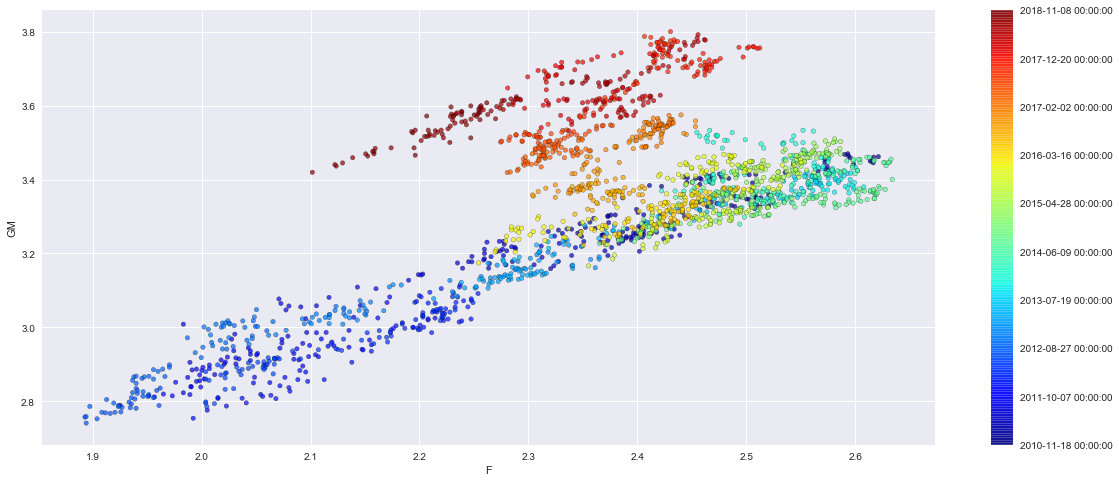

In [640]:
# Price relationship along time
cm = plt.get_cmap('jet')
colors = np.linspace(0.1, 1, len(x))
plt.figure(figsize=(20,8))
sc = plt.scatter(x,y, s=20, c=colors, cmap=cm, edgecolor='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([p for p in close_price[::len(close_price)//9].index]);
plt.xlabel('F')
plt.ylabel('GM');


### GM and Ford - kalman Filter price regression

- We are going to use a Kalman Filter to see the relationship of adjusted prices along time. Between GM and F
- The initial Guess of the parmeters is mean (0.95,0.95) with a covariance matrix of ones (1,1)
- Also it is asume that the parameters follow a random walk (transition matrix)
- with a small error term (small number times the identity)


In [20]:
delta = 1e-3
trans_cov = delta / (1 - delta) * np.eye(2) # How much random walk wiggles
obs_mat = np.expand_dims(np.vstack([[x], [np.ones(len(x))]]).T, axis=1)

kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, # y is 1-dimensional, (alpha, beta) is 2-dimensional
                  initial_state_mean=[0.95,0.95],
                  initial_state_covariance=np.ones((2, 2)),# 2x2 matrix of ones for covariance matrix estimate
                  transition_matrices=np.eye(2),
                  observation_matrices=obs_mat,
                  observation_covariance=2,
                  transition_covariance=trans_cov)

Use the observations y to get running estimates and errors for the state parameters

In [21]:
state_means_gm, state_covs_gm = kf.filter(y.values)

Plot of the slope and the intercept

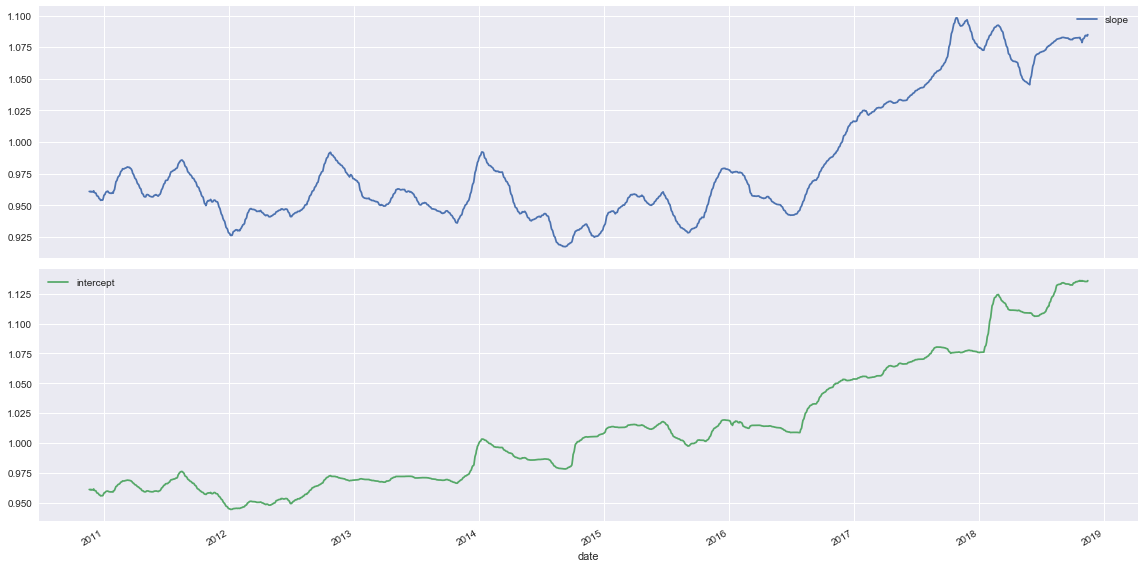

In [25]:
pd.DataFrame(dict(slope=state_means_gm[:, 0], intercept=state_means_gm[:, 1]), index=close_price.index).plot(figsize=(16,8),subplots=True)
plt.tight_layout();

In the next chart we are going to se how does the betas change along time 

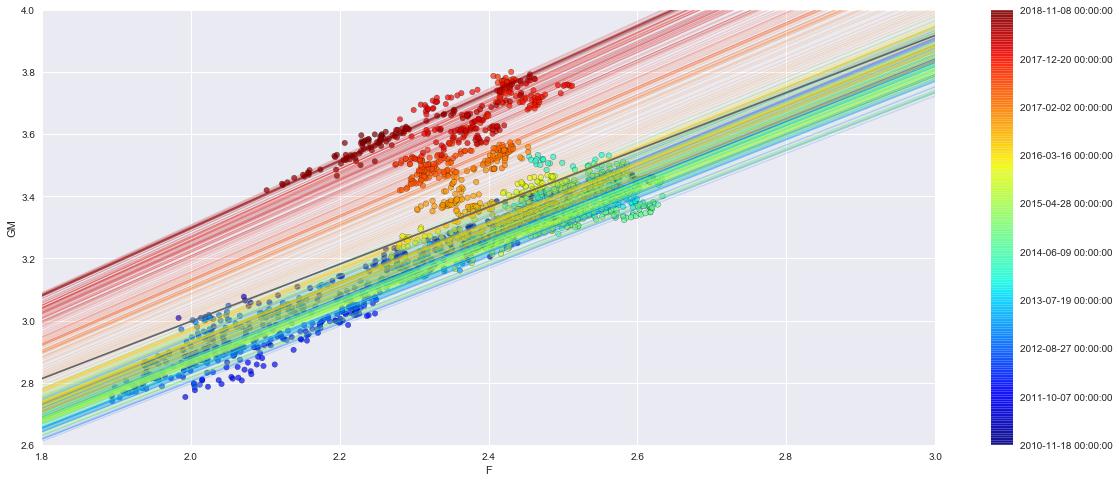

In [644]:
# Plot data points using colormap
plt.figure(figsize=(20,8))
sc = plt.scatter(x, y, s=30, c=colors, cmap=cm, edgecolor='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([p for p in x[::len(x)//9].index])

# Plot every fifth line
step = 5
xi = np.linspace(x.min()-5, x.max()+5, 2)
colors_l = np.linspace(0.1, 1, len(state_means_gm[::step]))
for i, beta in enumerate(state_means_gm[::step]):
    plt.plot(xi, beta[0] * xi + beta[1], alpha=.2, lw=1, c=cm(colors_l[i]))
    
# Plot the OLS regression line
plt.plot(xi, poly1d(np.polyfit(x, y, 1))(xi), '0.4')

# Adjust axes for visibility
plt.axis([1.8, 3, 2.6, 4 ])

# Label axes
plt.xlabel('F')
plt.ylabel('GM');


# 3. Spread

GM Vs F

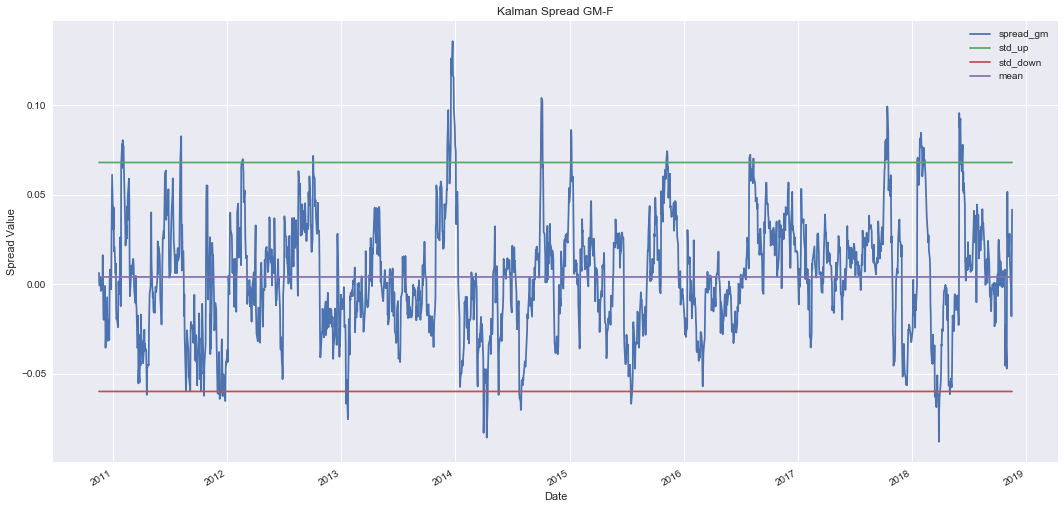

In [37]:
price_estimate=state_means_gm[:, 0]*x+state_means_gm[:, 1]
spread_gm=pd.DataFrame(y-price_estimate).dropna()
spread_gm = spread_gm.rename(columns={0: 'spread_gm'})
std=spread_gm.std()*2
mean=spread_gm.mean()
spread_gm['std_up']=mean[0]+std[0]
spread_gm['std_down']=mean[0]-std[0]
spread_gm['mean']=mean[0]
spread_gm.plot(figsize=(18,9))
plt.title('Kalman Spread GM-F')
plt.xlabel('Date')
plt.ylabel('Spread Value');

# 4. Backtest

# GM vs F

In [38]:
spread_gm['gm_return']=daily_return['GM'].shift(-1).fillna(0)
spread_gm['f_return']=daily_return['F'].shift(-1).fillna(0)
spread_gm.head()

,spread_gm,std_up,std_down,mean,gm_return,f_return
date,,,,,,
2010-11-18,0.006327,0.068037,-0.059923,0.004057,0.204506,0.987748
2010-11-19,-0.000600,0.068037,-0.059923,0.004057,-0.526821,-0.493076
2010-11-22,-0.000771,0.068037,-0.059923,0.004057,-2.465471,-3.135015
2010-11-23,0.003567,0.068037,-0.059923,0.004057,0.689322,1.580221
2010-11-24,-0.003794,0.068037,-0.059923,0.004057,0.951251,0.936284


This are the number of stock that we might trade at the time of the trade. 

\begin{align}
number\ of\ stocks= \frac{\beta_t*X_t}{P_x}
\end{align}

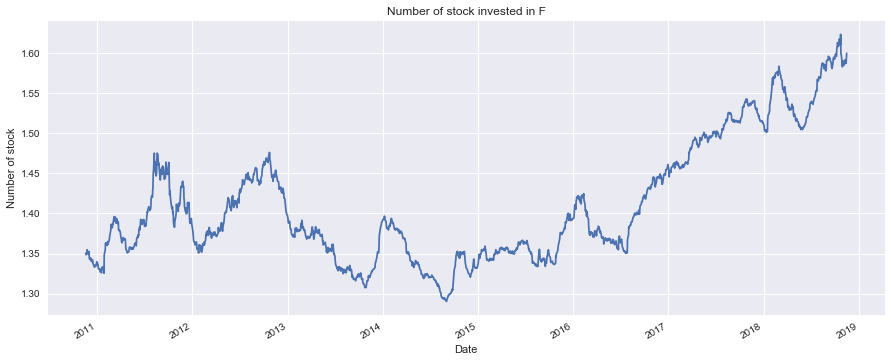

In [39]:
spread_gm['number_stocks']=(state_means_gm[:, 0]*x+state_means_gm[:, 1])/x
spread_gm['number_stocks'].plot(figsize=(15,6))

plt.title('Number of stock invested in F')
plt.xlabel('Date')
plt.ylabel('Number of stock');

The next step is to created the area of trading. In this case, if the spread>=std_up the area is going to be mark with a -1 (short positions). In the other case, if the price <= std_down, then the area is going to be marked with a +1 (long position).

In [40]:
area_short=0
spread_gm['short_area'] = 0
for i, item in enumerate(spread_gm['spread_gm']):
    if item>=spread_gm['std_up'][i]:
        area_short=1
    else:
        area_short=0
    spread_gm['short_area'][i] = area_short

area_long=0
spread_gm['long_area'] = 0
for i, item in enumerate(spread_gm['spread_gm']):
    if item<=spread_gm['std_down'][i]:
        area_long=-1
    else:
        area_long=0
    spread_gm['long_area'][i] = area_long

If the price is in the long area (price<=std_down) a long trade is going to be open if the price cross over the std_down, instead if the price is in the short area (price>=std_up) a short trade is going to be open if the price cross under the std_up. 

The cross over o cross under is going to be signaled with -1 or +1. with the difference:

In [41]:
spread_gm['short_change'] = spread_gm['short_area'].diff()
spread_gm['long_change'] = spread_gm['long_area'].diff()

Trade conditions. Short

In [42]:
spread_gm['short_position'] = 0
spread_gm['short_stock_position'] = 0
position_short=0
number_stocks=0
for i, item in enumerate(spread_gm['short_change']):
    if item==-1: #and position_short>-3:
        position_short-=1
        number_stocks+=spread_gm['number_stocks'][i]*(-1)
    if spread_gm['spread_gm'][i]<=spread_gm['mean'][i]:
        number_stocks=number_stocks-number_stocks
        position_short=position_short-position_short
    spread_gm['short_position'][i] = position_short
    spread_gm['short_stock_position'][i] = number_stocks


Trade conditions. Long: 

In [43]:
spread_gm['long_position'] = 0
spread_gm['long_stock_position'] = 0
position_long=0
number_stocks=0
for i, item in enumerate(spread_gm['long_change']):
    if item==1: #and position_long<3:
        position_long+=1
        number_stocks+=spread_gm['number_stocks'][i]*1
        
    if spread_gm['spread_gm'][i]>=spread_gm['mean'][i]:
        position_long=position_long-position_long
        number_stocks=number_stocks-number_stocks
    spread_gm['long_position'][i] = position_long
    spread_gm['long_stock_position'][i] = number_stocks

The spread of the kalman filter means that a portfolio of one stock (Y) that cost Py, might be equal to a portfolio of (alpha+beta_kalma*Px)/Px stock's of X.

In that way the amount of money invested in the stock X is equal to alpha+beta_kalma*Px. 


In the next graph is shown the amount of stocks of x that are sell.

The daily return of the strategy is going to be the spread. The spread is equall to:

\begin{align}
where:\\
\ ry_t: daily\ return\ of\ stock\ y \\
\ Position: Number\ of\ stocks\ buy\ or\ sell\ in\ y \\
\ rx_t: daily\ return\ of\ stock\ x \\
\end{align}

\begin{align}
Spread Return= ry_t*position- rx_t*\frac{\beta_t*X_t}{P_x}
\end{align}








In [44]:
spread_gm['daily_return']=spread_gm['gm_return']*(spread_gm['long_position']+spread_gm['short_position'])-spread_gm['f_return']*(spread_gm['long_stock_position']+spread_gm['short_stock_position'])
spread_gm['strategy_return_cum']=spread_gm['daily_return'].cumsum()

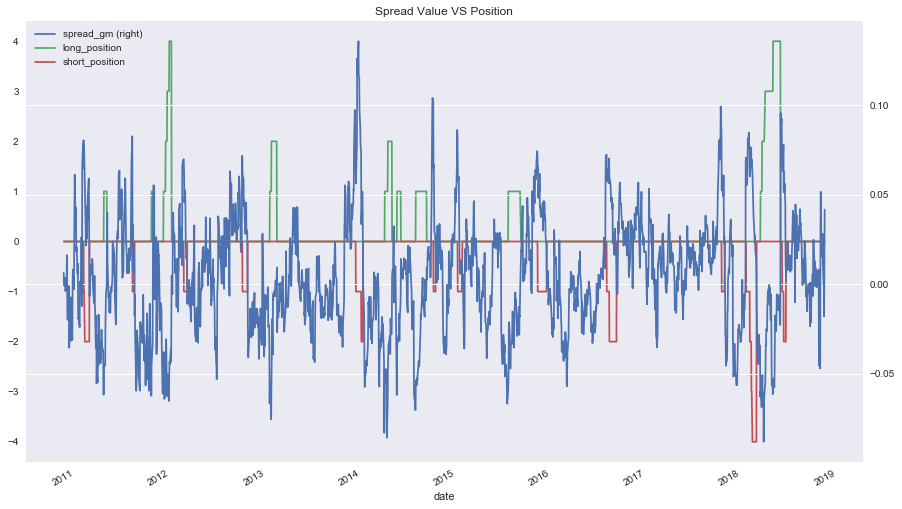

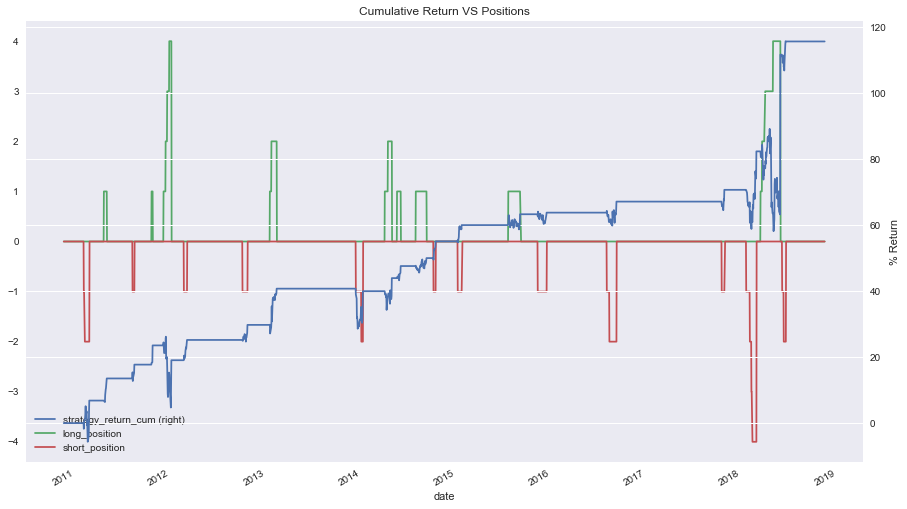

In [47]:
spread_gm[['spread_gm','long_position','short_position']].plot(figsize=(15,9),secondary_y=('spread_gm'))
plt.title('Spread Value VS Position')
plt.xlabel('Date');
plt.show()
spread_gm[['strategy_return_cum','long_position','short_position']].plot(figsize=(15,9),secondary_y=('strategy_return_cum'))
plt.title('Cumulative Return VS Positions')
plt.xlabel('Date')
plt.ylabel('% Return');

# Kalman Filter with Returns

Instead of the price, the Kalman Filter is going to be applied to the daily return 

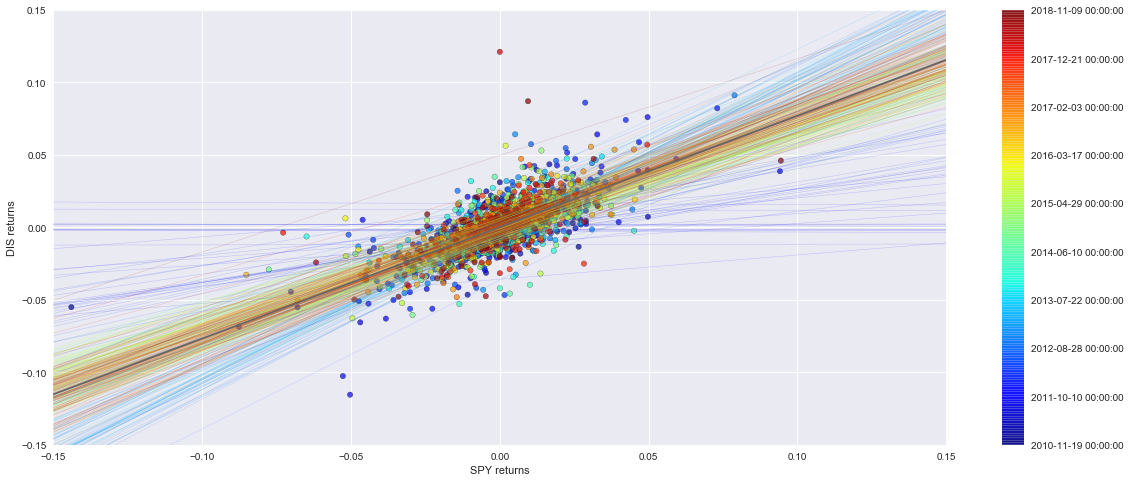

In [28]:
y_r = np.log(close_price['GM']/close_price['GM'].shift(1)).dropna()
x_r = np.log(close_price['F']/close_price['F'].shift(1)).dropna()
cm = plt.get_cmap('jet')
colors = np.linspace(0.1, 1, len(x_r))

# Run Kalman filter on returns data. Assumptions: Mean=0, Covariance=1
delta_r = 1e-2
trans_cov_r = delta_r / (1 - delta_r) * np.eye(2) # How much random walk wiggles
obs_mat_r = np.expand_dims(np.vstack([[x_r], [np.ones(len(x_r))]]).T, axis=1)
kf_r = KalmanFilter(n_dim_obs=1, n_dim_state=2, # y_r is 1-dimensional, (alpha, beta) is 2-dimensional
                  initial_state_mean=[0,0],
                  initial_state_covariance=np.ones((2, 2)),
                  transition_matrices=np.eye(2),
                  observation_matrices=obs_mat_r,
                  observation_covariance=.01,
                  transition_covariance=trans_cov_r)
state_means_r, state_covs_r= kf_r.filter(y_r.values)

# Plot data points using colormap
plt.figure(figsize=(20,8))
colors_r = np.linspace(0.1, 1, len(x_r))
sc = plt.scatter(x_r, y_r, s=30, c=colors_r, cmap=cm, edgecolor='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([p for p in x_r[::len(x_r)//9].index])

# Plot every fifth line
step = 5
xi = np.linspace(x_r.min()-4, x_r.max()+4, 2)
colors_l = np.linspace(0.1, 1, len(state_means_r[::step]))
for i, beta in enumerate(state_means_r[::step]):
    plt.plot(xi, beta[0] * xi + beta[1], alpha=.2, lw=0.5, c=cm(colors_l[i]))

# Plot the OLS regression line
plt.plot(xi, poly1d(np.polyfit(x_r, y_r, 1))(xi), '0.4')

# Adjust axes for visibility
plt.axis([-0.15,0.15,-0.15, 0.15])

# Label axes
plt.xlabel('SPY returns')
plt.ylabel('DIS returns');

# The Black Line is the MLS estimation. As you can see the estimates from the Kalman Filter move around the MLE line
# In that way we are having B's (betas) that are changing in time. 

In [29]:

delta = 1e-3
trans_cov = delta / (1 - delta) * np.eye(2) # How much random walk wiggles
obs_mat = np.expand_dims(np.vstack([[x_r], [np.ones(len(x_r))]]).T, axis=1)

kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, # y is 1-dimensional, (alpha, beta) is 2-dimensional
                  initial_state_mean=[0.5,0.5],
                  initial_state_covariance=np.ones((2, 2)),# 2x2 matrix of ones for covariance matrix estimate
                  transition_matrices=np.eye(2),
                  observation_matrices=obs_mat,
                  observation_covariance=2,
                  transition_covariance=trans_cov)

In [30]:
# Use the observations y to get running estimates and errors for the state parameters
state_means, state_covs = kf.filter(y_r.values)

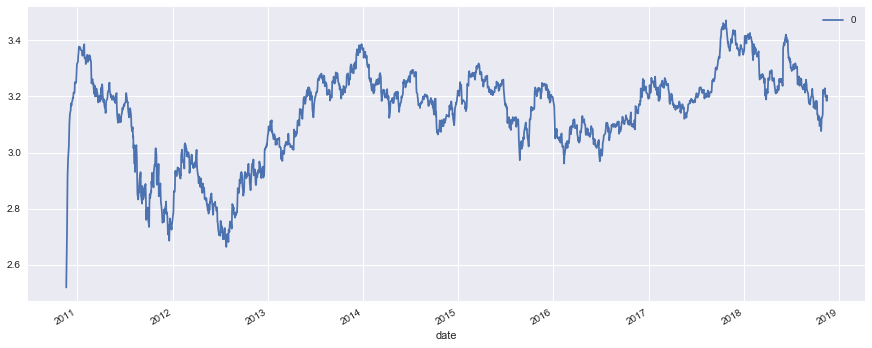

In [31]:
price_estimate=state_means[:, 0]*x[1:]
spread=pd.DataFrame(y-price_estimate).dropna()
spread.plot(figsize=(15,6))

As you can see the spread does not have a mean reverting process, in some case have  trend.

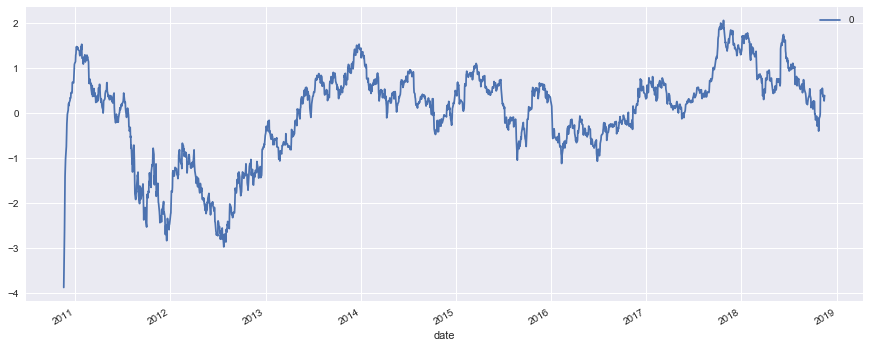

In [32]:
spread_z=(spread-spread.mean())/spread.std()
spread_z.plot(figsize=(15,6))

Even thought if we make a normalization we a Z- Score, the process does not have a mean reverting process. For that reason, is necesary to use a rolling mean and a rolling standar deviation, to make mean reverting process wwith a Z score

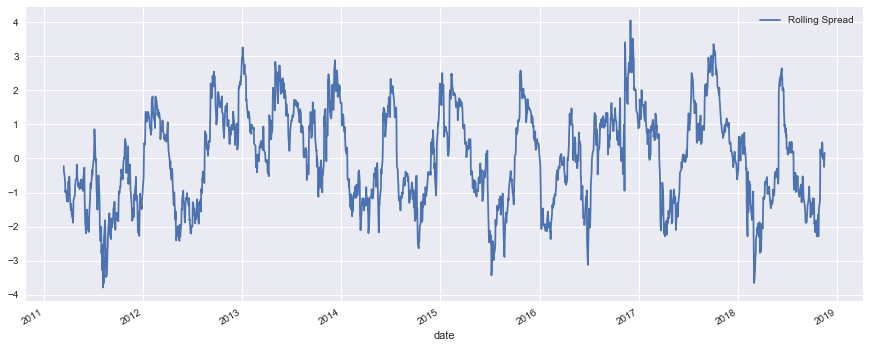

In [113]:
spread_z=pd.DataFrame((spread-spread.rolling(window=80).mean())/spread.rolling(window=80).std())
spread_z = spread_z.rename(columns={0: 'Rolling Spread'})
spread_z.plot(figsize=(15,6))

In this case, the process of the Z-Score is mean reverting

In [114]:
spread_z['number_stocks']=state_means[:, 0]
spread_z['gm_return']=daily_return['GM'].shift(-1).fillna(0)
spread_z['f_return']=daily_return['F'].shift(-1).fillna(0)
spread_z.tail()

,Rolling Spread,number_stocks,gm_return,f_return
date,,,,
2018-11-12,-0.021133,0.167465,0.670206,0.525487
2018-11-13,0.115717,0.167490,-1.967461,0.000000
2018-11-14,-0.247748,0.167493,0.904216,-2.440439
2018-11-15,0.046465,0.167210,0.084353,-2.446439
2018-11-16,0.162873,0.167111,0.000000,0.000000


In [115]:
area_short=0
spread_z['short_area'] = 0
for i, item in enumerate(spread_z['Rolling Spread']):
    if item>=2:
        area_short=1
    else:
        area_short=0
    spread_z['short_area'][i] = area_short

area_long=0
spread_z['long_area'] = 0
for i, item in enumerate(spread_z['Rolling Spread']):
    if item<=-2:
        area_long=-1
    else:
        area_long=0
    spread_z['long_area'][i] = area_long

In [116]:
spread_z['short_change'] = spread_z['short_area'].diff()
spread_z['long_change'] = spread_z['long_area'].diff()

In [117]:
spread_z['short_position'] = 0
spread_z['short_stock_position'] = 0
position_short=0
number_stocks=0
for i, item in enumerate(spread_z['short_change']):
    if item==-1: #and position_short>-3:
        position_short-=1
        number_stocks+=spread_z['number_stocks'][i]*(-1)
    if spread_z['Rolling Spread'][i]<=0:
        number_stocks=number_stocks-number_stocks
        position_short=position_short-position_short
    spread_z['short_position'][i] = position_short
    spread_z['short_stock_position'][i] = number_stocks


In [118]:
spread_z['long_position'] = 0
spread_z['long_stock_position'] = 0
position_long=0
number_stocks=0
for i, item in enumerate(spread_z['long_change']):
    if item==1: #and position_long<3:
        position_long+=1
        number_stocks+=spread_z['number_stocks'][i]*1
        
    if spread_z['Rolling Spread'][i]>=0:
        position_long=position_long-position_long
        number_stocks=number_stocks-number_stocks
    spread_z['long_position'][i] = position_long
    spread_z['long_stock_position'][i] = number_stocks

In [119]:
spread_z['daily_return']=spread_z['gm_return']*(spread_z['long_position']+spread_z['short_position'])-spread_z['f_return']*(spread_z['long_stock_position']+spread_z['short_stock_position'])
spread_z['strategy_return_cum']=spread_z['daily_return'].cumsum()

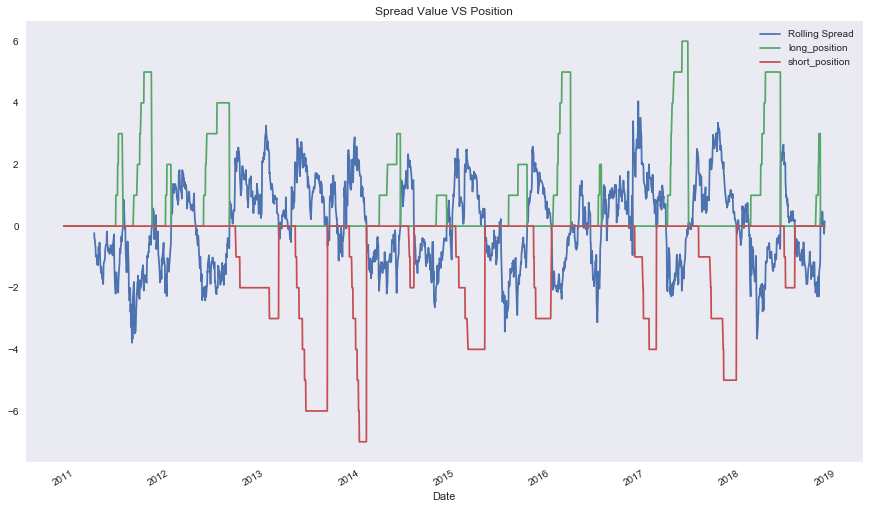

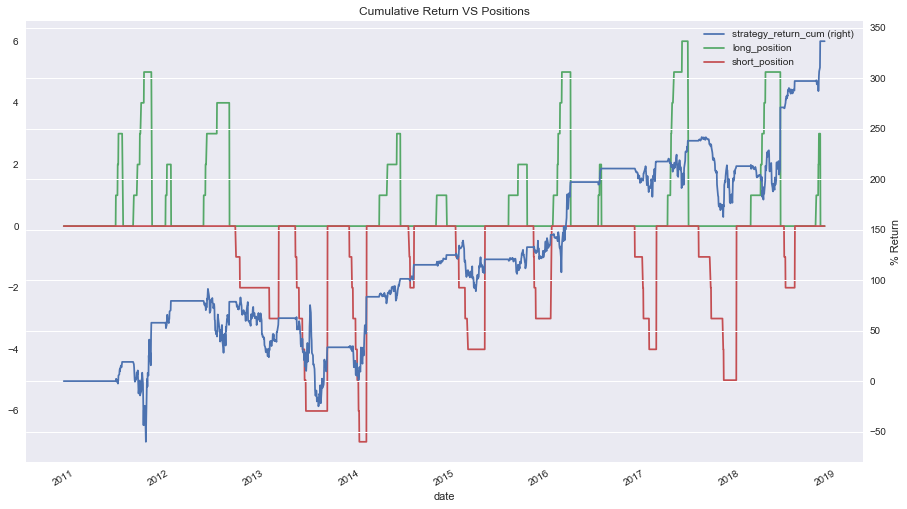

In [120]:
spread_z[['Rolling Spread','long_position','short_position']].plot(figsize=(15,9),secondary_y=('spread_gm'))
plt.title('Spread Value VS Position')
plt.xlabel('Date');
plt.show()
spread_z[['strategy_return_cum','long_position','short_position']].plot(figsize=(15,9),secondary_y=('strategy_return_cum'))
plt.title('Cumulative Return VS Positions')
plt.xlabel('Date')
plt.ylabel('% Return');